# A) LOADING THE DATASET

In [ ]:
import os
import pandas as pd
folder_path = r"C:\Users\olaol\OneDrive\Desktop\SEM B\text processing\bbc"
topics = os.listdir(folder_path)
documents = []
for topic in topics:
    topic_dir = os.path.join(folder_path, topic)
    for file in os.listdir(topic_dir):
        with open(os.path.join(topic_dir, file), 'r', encoding= 'latin-1') as file:
            text = file.read()
            documents.append({'original_text': text, 'topic_labels': topic})
bbc_df = pd.DataFrame(documents)

In [2]:
bbc_df.head(5)

,original_text,topic_labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [3]:
bbc_df['topic_labels'].value_counts()

topic_labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

<Axes: >

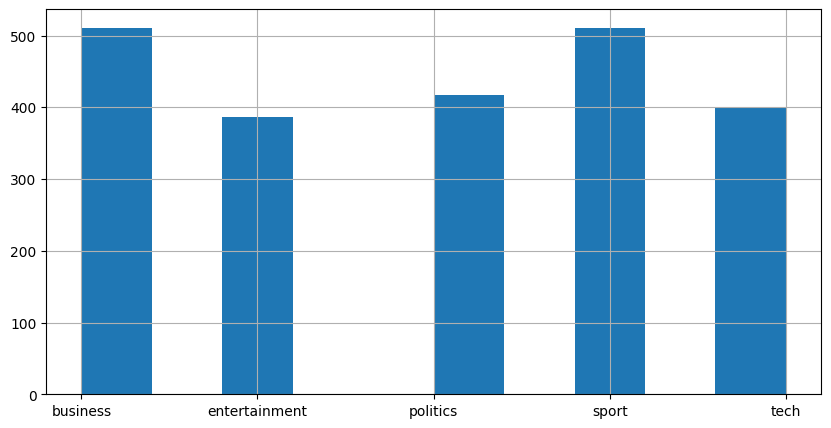

In [4]:
# check if the dataset is balanced through histogram plot - This dataset is balanced as no class is overly represented, so
# there is no need of balancing the dataset
bbc_df['topic_labels'].hist(figsize = (10, 5))

# B) TEXT PREPROCESSING

In [ ]:
# The preprocessing done are:
# punctuation removals
# stop words removal
# stemming and lemmatization

In [10]:
import nltk
import numpy as np
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def preprocess_document(doc):
    # Lower case and remove special characters\whitespaces 
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc= doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
# Apply preprocessing to the original text
bbc_df['preprocessed_text'] = bbc_df['original_text'].apply(preprocess_document)

# Display the DataFrame with original and preprocessed text, and labels
display(bbc_df[['original_text', 'preprocessed_text', 'topic_labels']])

,original_text,preprocessed_text,topic_labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,ad sales boost time warner profit quarterly pr...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,dollar gains greenspan speech dollar hit highe...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,yukos unit buyer faces loan claim owners embat...,business
3,High fuel prices hit BA's profits\n\nBritish A...,high fuel prices hit bas profits british airwa...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,pernod takeover talk lifts domecq shares uk dr...,business
...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,bt program beat dialler scams bt introducing t...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,spam emails tempt net shoppers computer users ...,tech
2222,Be careful how you code\n\nA new European dire...,careful code new european directive could put ...,tech
2223,US cyber security chief resigns\n\nThe man mak...,us cyber security chief resigns man making sur...,tech


# C) DATASET SPLITTING INTO 70 - 30

In [11]:
from sklearn.model_selection import train_test_split
features = bbc_df['preprocessed_text']
labels = bbc_df['topic_labels']
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)
(features_train.shape, labels_train.shape), (features_test.shape, labels_test.shape)

(((1557,), (1557,)), ((668,), (668,)))

# D) FEATURE EXTRACTION / TEXT VECTORIZATION TECHNIQUES

In [ ]:
# Feature extraction techniques include:
# 1) TF-IDF
# 2) BAG OF WORDS(COUNT VECTORIZER)
# 3) WORD EMBEDDINGS - USING PRETRAINED MODEL

# D1) FEATURE 1 - TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY(TF-IDF)

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on the training data
features_train_tfidf = tfidf_vectorizer.fit_transform(features_train)

# Transform the test data
features_test_tfidf = tfidf_vectorizer.transform(features_test)

# D2) FEATURE 2 - BAG OF WORDS (COUNTVECTORIZER)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform on the training data
features_train_bow = count_vectorizer.fit_transform(features_train)

# Transform the test data
features_test_bow = count_vectorizer.transform(features_test)

# D3) FEATURE 3 - WORD EMBEDDINGS (SPACY PRETRAINED MODEL)

In [ ]:
# initial step is to install - the pretrained model using the command - ( python -m spacy download en_core_web_lg) on command prompt

In [16]:
import spacy
import numpy as np

# Load spaCy's pre-trained model with large word vectors
nlp = spacy.load("en_core_web_lg")

# function to create document vectors using spaCy embeddings
def document_vector_spacy(doc):
    doc = nlp(doc)
    return doc.vector

# Convert train and test data into spaCy word embeddings
feature_train_spacy = np.array([document_vector_spacy(text) for text in features_train])
feature_test_spacy = np.array([document_vector_spacy(text) for text in features_test])

# E - TOPIC LABELLER / ML ALGORITHMS

In [ ]:
# These steps involve training ml algorithm on the individual features extracted
# 1) SVM 
# 2) Naive Bayes

# E1) SUPPORT VECTOR MACHINE + TF-IDF

Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       165
entertainment       0.98      0.98      0.98       118
     politics       0.97      0.97      0.97       120
        sport       0.99      0.99      0.99       140
         tech       0.98      0.96      0.97       125

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668

Test Accuracy: 0.9775449101796407


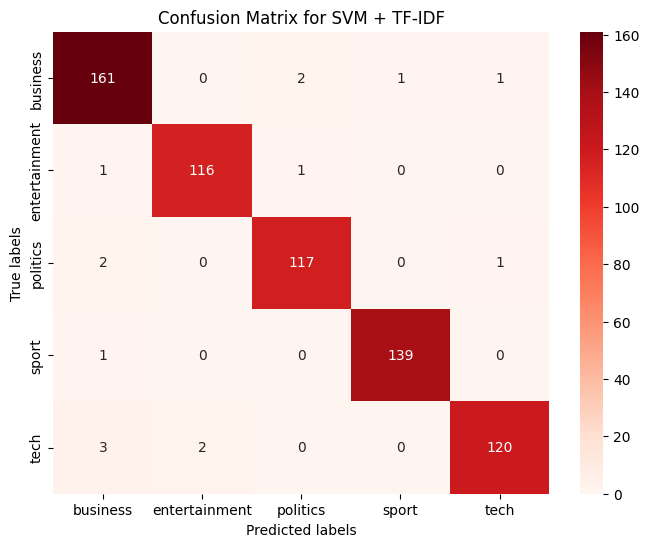

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# SVM classifier
svm_classifier = SVC()

# Train SVM classifier
svm_classifier.fit(features_train_tfidf, labels_train)

# Test SVM classifier
predictions_tfidf = svm_classifier.predict(features_test_tfidf)

# Print classification report
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print("Classification Report:")
print(classification_report(labels_test, predictions_tfidf, target_names = target_names))

# Calculate accuracy
accuracy_tfidf = accuracy_score(labels_test, predictions_tfidf)
print("Test Accuracy:", accuracy_tfidf)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions_tfidf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels= target_names, yticklabels= target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM + TF-IDF')
plt.show()

# E2) - SUPPORT VECTOR MACHINE + BAG OF WORDS

Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.95      0.95       165
entertainment       0.98      0.96      0.97       118
     politics       0.95      0.97      0.96       120
        sport       0.99      1.00      0.99       140
         tech       0.94      0.95      0.95       125

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668

Test Accuracy: 0.9640718562874252


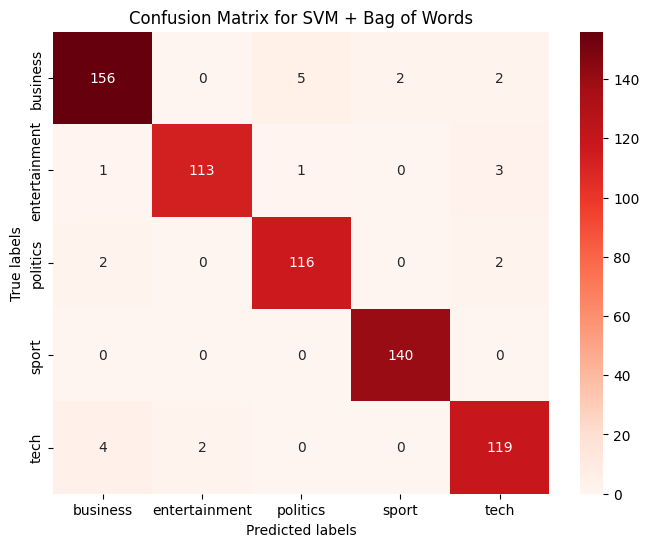

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# SVM classifier
svm_classifier = SVC()

# Train SVM classifier
svm_classifier.fit(features_train_bow, labels_train)

# Test SVM classifier
predictions_bow = svm_classifier.predict(features_test_bow)

# Print classification report
print("Classification Report:")
print(classification_report(labels_test, predictions_bow))

# Calculate accuracy
accuracy_bow = accuracy_score(labels_test, predictions_bow)
print("Test Accuracy:", accuracy_bow)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions_bow)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM + Bag of Words')
plt.show()

# E3) - SUPPORT VECTOR MACHINE + WORD EMBEDDINGS

Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.95      0.94       165
entertainment       1.00      0.94      0.97       118
     politics       0.91      0.93      0.92       120
        sport       0.99      0.99      0.99       140
         tech       0.95      0.98      0.96       125

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668

Test Accuracy: 0.9565868263473054


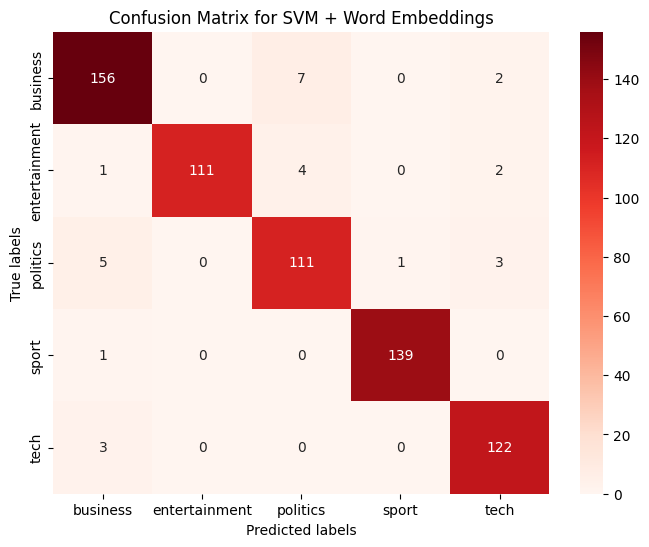

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# SVM classifier
svm_classifier = SVC()

# Train SVM classifier on train data
svm_classifier.fit(feature_train_spacy, labels_train)

# Test SVM classifier on test data
predictions_spacy = svm_classifier.predict(feature_test_spacy)

# Print classification report
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print("Classification Report:")
print(classification_report(labels_test, predictions_spacy, target_names = target_names))

# Calculate accuracy
accuracy_spacy = accuracy_score(labels_test, predictions_spacy)
print("Test Accuracy:", accuracy_spacy)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions_spacy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels= target_names, yticklabels= target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM + Word Embeddings')
plt.show()

# E4) - NAIVE BAYES + TF-IDF

Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.96      0.96       165
entertainment       0.99      0.93      0.96       118
     politics       0.94      0.97      0.96       120
        sport       0.98      0.99      0.99       140
         tech       0.97      0.98      0.97       125

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668

Test Accuracy: 0.968562874251497


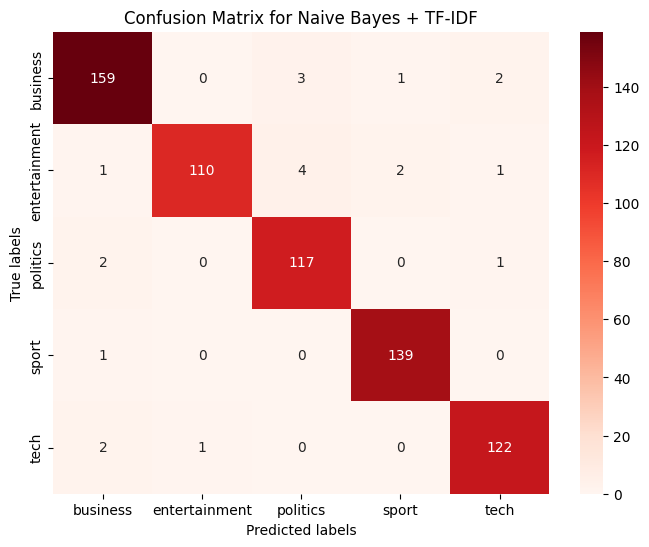

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train Naive Bayes classifier on train data
nb_classifier.fit(features_train_tfidf, labels_train)

# Test Naive Bayes classifier on test data
predictions_tfidf_bayes = nb_classifier.predict(features_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(labels_test, predictions_tfidf_bayes))

# Calculate accuracy
accuracy_tfidf_bayes = accuracy_score(labels_test, predictions_tfidf_bayes)
print("Test Accuracy:", accuracy_tfidf_bayes)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions_tfidf_bayes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Naive Bayes + TF-IDF')
plt.show()

# E5) NAIVE BAYES + BAG OF WORDS

Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.95      0.96       165
entertainment       0.99      0.96      0.97       118
     politics       0.94      0.97      0.96       120
        sport       1.00      0.99      1.00       140
         tech       0.95      0.99      0.97       125

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668

Test Accuracy: 0.9730538922155688


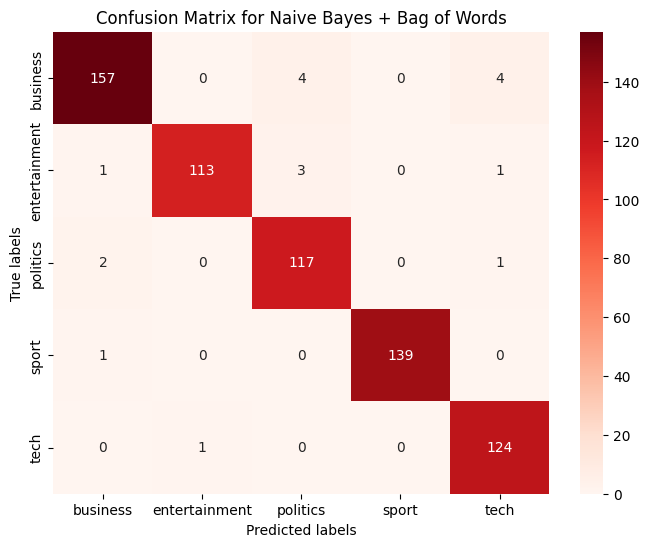

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train Naive Bayes classifier on train data
nb_classifier.fit(features_train_bow, labels_train)

# Test Naive Bayes classifier on test data
predictions_bow_bayes = nb_classifier.predict(features_test_bow)

# Print classification report
print("Classification Report:")
print(classification_report(labels_test, predictions_bow_bayes))

# Calculate accuracy
accuracy_bow_bayes = accuracy_score(labels_test, predictions_bow_bayes)
print("Test Accuracy:", accuracy_bow_bayes)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions_bow_bayes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Naive Bayes + Bag of Words')
plt.show()

# DEEP LEARNING

## 1) FULLY CONNECTED NEURAL NETWORK + WORD EMBEDDINGS

Epoch 1/30


C:\Users\olaol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3500 - loss: 1.8744
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7045 - loss: 0.8323
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8103 - loss: 0.5777
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8474 - loss: 0.4844
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8915 - loss: 0.3395
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8942 - loss: 0.3325
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8961 - loss: 0.3073
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9182 - loss: 0.2404
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9269 - loss: 0.2274
Epoch 10/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.2366
Epoch 11/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9353 - loss: 0.2080
Epoch 12/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.2006


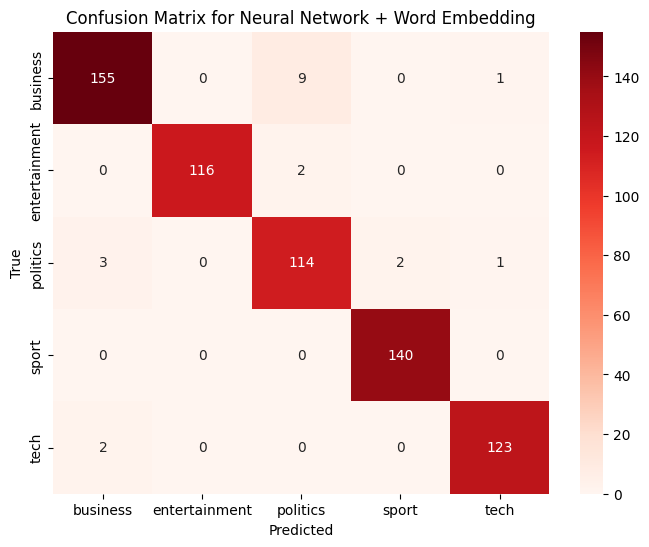

In [113]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(len(feature_train_spacy[0]),)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(feature_train_spacy, labels_train, epochs=30, batch_size=32, verbose=1)

# Evaluate on test data
test_loss, test_accuracy_nn = model.evaluate(feature_test_spacy, labels_test)
print("Test Accuracy:", test_accuracy_nn)

# Predict on test data
predictions = model.predict(feature_test_spacy)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print("Classification Report:")
print(classification_report(labels_test, predicted_labels, target_names=target_names))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(labels_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network + Word Embedding')
plt.show()

# 2) FULLY CONNECTED NEURAL NETWORK + TF-IDF

C:\Users\olaol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.2349 - loss: 1.6086
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5062 - loss: 1.5945
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6792 - loss: 1.5493
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7830 - loss: 1.4320
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8835 - loss: 1.1872
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9503 - loss: 0.8515
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9763 - loss: 0.5356
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9801 - loss: 0.3109
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9923 - loss: 0.1976
Epoch 10/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9984 - loss: 0.1294
Epoch 11/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9974 - loss: 0.0956
Epoch 12/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy:

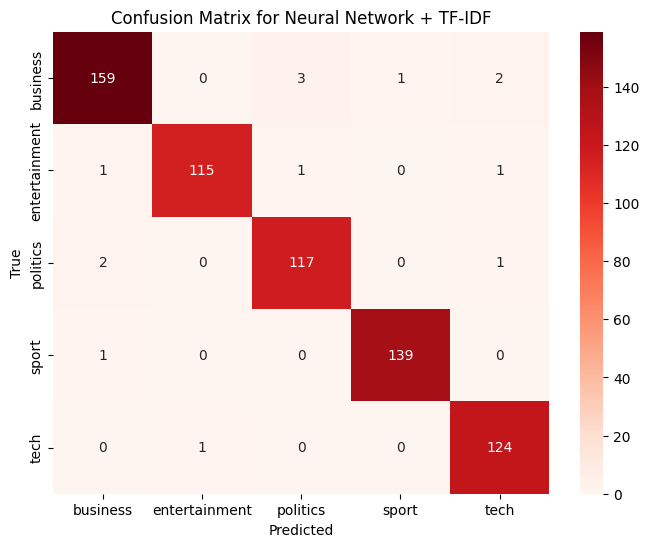

In [134]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# input shape
input_shape = features_train_tfidf.shape[1]

# CNN architecture 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(features_train_tfidf, labels_train, epochs=30, batch_size=32, verbose=1)

# Evaluate on test data
test_loss, test_accuracy_nn_tfidf = model.evaluate(features_test_tfidf, labels_test)
print("Test Accuracy:", test_accuracy_nn_tfidf)

# test data
predictions = model.predict(features_test_tfidf)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(labels_test, predicted_labels, target_names=target_names))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(labels_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network + TF-IDF')
plt.show()

# VISUALIZATION OF ALL MODELS WITH DIFFERENT FEATURES EXTRACTION TECHNIQUES

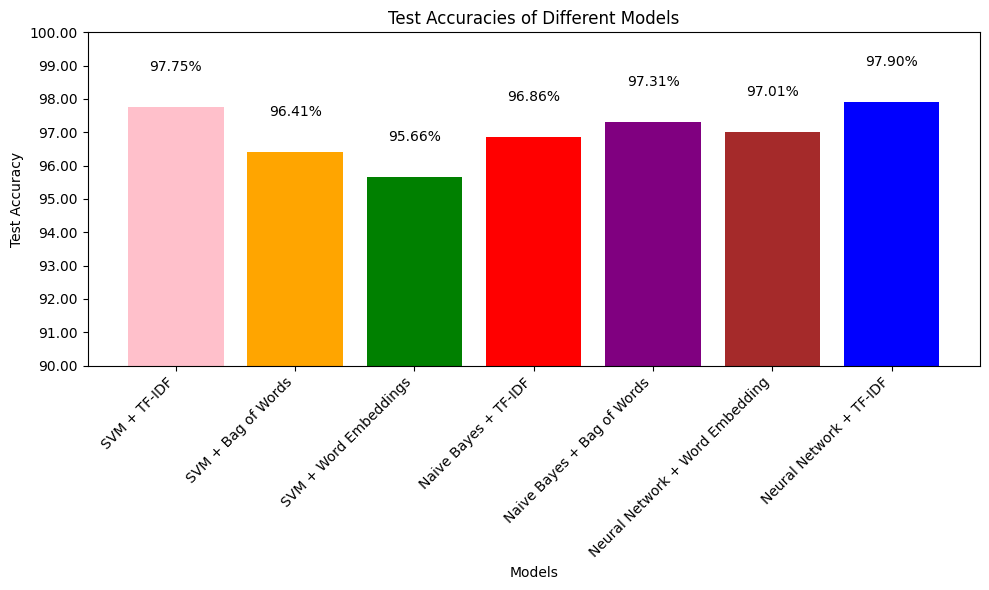

In [146]:
import matplotlib.pyplot as plt

# Test accuracies of each model
models = ['SVM + TF-IDF', 'SVM + Bag of Words', 'SVM + Word Embeddings', 
          'Naive Bayes + TF-IDF', 'Naive Bayes + Bag of Words', 
          'Neural Network + Word Embedding', 'Neural Network + TF-IDF']

test_accuracies = [accuracy_tfidf, accuracy_bow, accuracy_spacy,
                   accuracy_tfidf_bayes, accuracy_bow_bayes,
                   test_accuracy_nn, test_accuracy_nn_tfidf]

# colors for each model
colors = ['pink', 'orange', 'green', 'red', 'purple', 'brown', 'blue']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, test_accuracies, color=colors)

# percentage labels on top of each bar
for bar, accuracy in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01 if bar.get_height() < 0.99 else bar.get_height() - 0.01,
             f'{accuracy:.2%}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Different Models')
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks from 0.90 to close to 1 with increments of 0.01
plt.yticks([i / 100 for i in range(90, 101)], [f'{i:.2f}' for i in range(90, 101)])

plt.ylim(0.90, 1)
plt.tight_layout()
plt.show()